# 最小全域木問題（Primのアルゴリズム）

ある点を選んで、そこから最小のコストのネットワーク先にある頂点を追加していく方法

In [1]:
def prim(G):
    V = [v for v in G.nodes()]
    print('V:', V)
    n = len(V)
    # 初期値を決める
    T = []
    S = [V[0]]
    
    # TとSの数が一致するまでループ
    while len(S) < n:
        # uが初期値の時に、隣接する頂点がv,weightがwに入る
        candidates = [(u,v,w['weight']) for u in S
                      for v,w in G[u].items() if not(v in S)]
        print("candidates", candidates)
        # weightが最小のものをS, Tに追加する
        (u,v,w) = min(candidates,key=lambda x:x[2])
        S += [v]
        T += [(u,v)]
    return T

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# 問題設定
weighted_elist = [('D','G',195), ('D','R',130), ('D','S',260), 
                  ('G','R',195), ('G','N',166), ('R','S',132),
                  ('R','M',114), ('R','N',227), ('M','S',114),
                  ('M','P',114), ('M','N',166), ('N','P',195),
                  ('P','S',114)]

p = {'D': (0,15),'G':(11,19),'N':(17,12),'R':(6,9),'M':(10,4),
     'P':(15,0), 'S':(5,0)}
G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)

# エッジのラベルを作成
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}
print('elbs:', elbs)

# 太線にするエッジを作成
mst = prim(G)
print('mst:', mst)

# 描画
nx.draw_networkx(G, pos=p, node_color='lightgrey',node_size=500, width=1)
nx.draw_networkx_edges(G, pos=p, edgelist=mst, width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=elbs)
plt.axis('off')
plt.show()

elbs: {('D', 'G'): 195, ('D', 'R'): 130, ('D', 'S'): 260, ('G', 'R'): 195, ('G', 'N'): 166, ('R', 'S'): 132, ('R', 'M'): 114, ('R', 'N'): 227, ('S', 'M'): 114, ('S', 'P'): 114, ('N', 'M'): 166, ('N', 'P'): 195, ('M', 'P'): 114}
V: ['D', 'G', 'R', 'S', 'N', 'M', 'P']
candidates [('D', 'G', 195), ('D', 'R', 130), ('D', 'S', 260)]
candidates [('D', 'G', 195), ('D', 'S', 260), ('R', 'G', 195), ('R', 'S', 132), ('R', 'M', 114), ('R', 'N', 227)]
candidates [('D', 'G', 195), ('D', 'S', 260), ('R', 'G', 195), ('R', 'S', 132), ('R', 'N', 227), ('M', 'S', 114), ('M', 'P', 114), ('M', 'N', 166)]
candidates [('D', 'G', 195), ('R', 'G', 195), ('R', 'N', 227), ('M', 'P', 114), ('M', 'N', 166), ('S', 'P', 114)]
candidates [('D', 'G', 195), ('R', 'G', 195), ('R', 'N', 227), ('M', 'N', 166), ('P', 'N', 195)]
candidates [('D', 'G', 195), ('R', 'G', 195), ('N', 'G', 166)]
mst: [('D', 'R'), ('R', 'M'), ('M', 'S'), ('M', 'P'), ('M', 'N'), ('N', 'G')]


<Figure size 640x480 with 1 Axes>

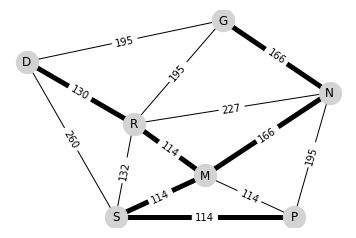

In [3]:
# networkxで計算可能
# kruskal(貪欲算): コストの小さい順にサイクルができない限り木に追加する

mst = nx.minimum_spanning_tree(G, algorithm='kruskal').edges() # primも選択可能

# 描画
nx.draw_networkx(G, pos=p, node_color='lightgrey',node_size=500, width=1)
nx.draw_networkx_edges(G, pos=p, edgelist=mst, width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=elbs)
plt.axis('off')
plt.show()

# 深さ優先探索

各頂点に宝があり、隣接する頂点しかわからない。この時に、できる限り奥に進んで、いけなくなったら来た道を一つ戻り、まだ行ったことが無い道を行く手法を深さ優先探索という。

In [4]:
# 深さ優先探索にはスタックというデータ形式を使う
# Pythonではdeque()を使う

import collections
S = collections.deque()
S.append('a')
S.append('b')
print(S) # a,bが追加される
print(S.pop()) # 後に追加したbを取り除く

deque(['a', 'b'])
b


In [5]:
S.append('c')
S.append('d')
S.append('e')
print(S.pop()) # 後に追加したeを取り除く
print(S)

e
deque(['a', 'c', 'd'])


In [6]:
G.edges

EdgeView([('D', 'G'), ('D', 'R'), ('D', 'S'), ('G', 'R'), ('G', 'N'), ('R', 'S'), ('R', 'M'), ('R', 'N'), ('S', 'M'), ('S', 'P'), ('N', 'M'), ('N', 'P'), ('M', 'P')])

In [7]:
def dfs(G):
    V = [v for v in G.nodes()]
    start = V[0]
    S = collections.deque([start])
    flagged = {v:False for v in G.nodes()}
    T = [] # Tが移動経路を表す
    while len(S) != 0:
        print("S:", S)
        print("flagged:", flagged)
        # stackの一番上の値を参照
        t = S[-1]
        flagged[t] = True
        # tが接続している頂点のうち、Flagがたっていないものを格納
        # uが現在の座標、vが移動先の座標
        edges = [(u,v) for (u,v) in G.edges(t) if not(flagged[v])]
        if edges != []:
            # 1番目の頂点を取得
            (u,v) = edges[0]
            # S、Tに格納
            S.append(v)
            T.append((u,v))
        # 行き先が無いときは一つ戻る
        else:
            S.pop()
    return T

In [8]:
# 問題設定
G = nx.grid_2d_graph(4,3)

# このようにすると、(0,0)と接続している頂点が出てくる
G.edges((0, 0))

EdgeDataView([((0, 0), (1, 0)), ((0, 0), (0, 1))])

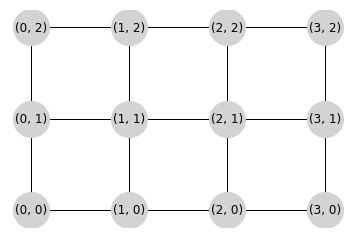

S: deque([(0, 0)])
flagged: {(0, 0): False, (0, 1): False, (0, 2): False, (1, 0): False, (1, 1): False, (1, 2): False, (2, 0): False, (2, 1): False, (2, 2): False, (3, 0): False, (3, 1): False, (3, 2): False}
S: deque([(0, 0), (1, 0)])
flagged: {(0, 0): True, (0, 1): False, (0, 2): False, (1, 0): False, (1, 1): False, (1, 2): False, (2, 0): False, (2, 1): False, (2, 2): False, (3, 0): False, (3, 1): False, (3, 2): False}
S: deque([(0, 0), (1, 0), (2, 0)])
flagged: {(0, 0): True, (0, 1): False, (0, 2): False, (1, 0): True, (1, 1): False, (1, 2): False, (2, 0): False, (2, 1): False, (2, 2): False, (3, 0): False, (3, 1): False, (3, 2): False}
S: deque([(0, 0), (1, 0), (2, 0), (3, 0)])
flagged: {(0, 0): True, (0, 1): False, (0, 2): False, (1, 0): True, (1, 1): False, (1, 2): False, (2, 0): True, (2, 1): False, (2, 2): False, (3, 0): False, (3, 1): False, (3, 2): False}
S: deque([(0, 0), (1, 0), (2, 0), (3, 0), (3, 1)])
flagged: {(0, 0): True, (0, 1): False, (0, 2): False, (1, 0): True, (1,

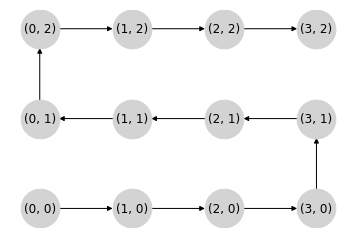

In [9]:
# 問題設定を可視化
p = {v:v for v in G.nodes()}
nx.draw_networkx(G, pos=p, node_color='lightgrey',node_size=1300,
        with_labels=True)
plt.axis('off')
plt.show()

# 計算結果を可視化
dfst = dfs(G)
DG = nx.DiGraph()
DG.add_edges_from(dfst)
nx.draw_networkx(DG, edgelist=dfst, pos=p, node_color='lightgrey',
        node_size=1500, with_labels=True)
plt.axis('off')
# plt.savefig('../fig3/grid43dfs.eps')
plt.show()

In [10]:
# networkxで計算可能
G = nx.grid_2d_graph(4,3)
T = nx.dfs_tree(G, source=(1,1)) # startを(1,1)にする
list(T.edges())

[((1, 1), (0, 1)),
 ((0, 1), (0, 0)),
 ((0, 0), (1, 0)),
 ((1, 0), (2, 0)),
 ((2, 0), (3, 0)),
 ((3, 0), (3, 1)),
 ((3, 1), (2, 1)),
 ((2, 1), (2, 2)),
 ((2, 2), (1, 2)),
 ((2, 2), (3, 2)),
 ((1, 2), (0, 2))]

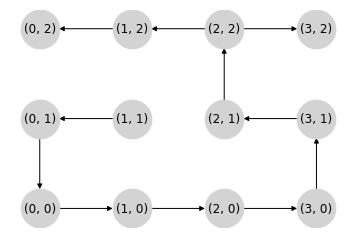

In [11]:
# 計算結果を可視化
DG = nx.DiGraph()
DG.add_edges_from(list(T.edges()))

nx.draw_networkx(DG, edgelist=list(T.edges()), pos=p, node_color='lightgrey',
        node_size=1500, with_labels=True)
plt.axis('off')
# plt.savefig('../fig3/grid43dfs.eps')
plt.show()

# 幅優先探索にはqueueを使う
queueは先入れ、先出しの処理になる

In [12]:
Q = collections.deque()
Q.append('a'); Q.append('b')
print(Q.popleft())
Q.append('c'); Q.append('d'); Q.append('e')
print(Q.popleft()); print(Q)

a
b
deque(['c', 'd', 'e'])


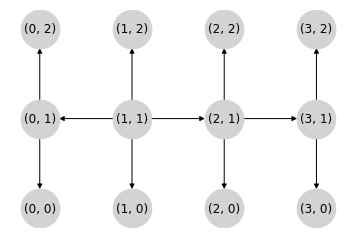

In [13]:
G = nx.grid_2d_graph(4,3)
T = nx.bfs_tree(G, source=(1,1)) # bfs_treeが幅優先探索

# 計算結果を可視化
DG = nx.DiGraph()
DG.add_edges_from(list(T.edges()))

nx.draw_networkx(DG, edgelist=list(T.edges()), pos=p, node_color='lightgrey',
        node_size=1500, with_labels=True)
plt.axis('off')
# plt.savefig('../fig3/grid43dfs.eps')
plt.show()